# Task-01: Population Visualization using World Bank Dataset

This notebook performs data loading, cleaning, and visualization of global population data using bar chart and histogram.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")


In [3]:
# Load the dataset
df = pd.read_csv('population.csv', skiprows=4)

# Preview data
df.head()


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,NaN,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130072080.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0,NaN,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,NaN,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0,NaN,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0,NaN,NaN


In [4]:
# Drop unnecessary columns (like unnamed or future years)
df_clean = df.drop(columns=['Indicator Name', 'Indicator Code', '2024', 'Unnamed: 69'], errors='ignore')

# Drop rows with missing population in 2022
df_clean = df_clean.dropna(subset=['2022'])

# Convert 2022 column to numeric
df_clean['2022'] = pd.to_numeric(df_clean['2022'], errors='coerce')

# Preview cleaned data
df_clean[['Country Name', '2022']].head()


,Country Name,2022
0,Aruba,107310.0
1,Africa Eastern and Southern,731821393.0
2,Afghanistan,40578842.0
3,Africa Western and Central,497387180.0
4,Angola,35635029.0


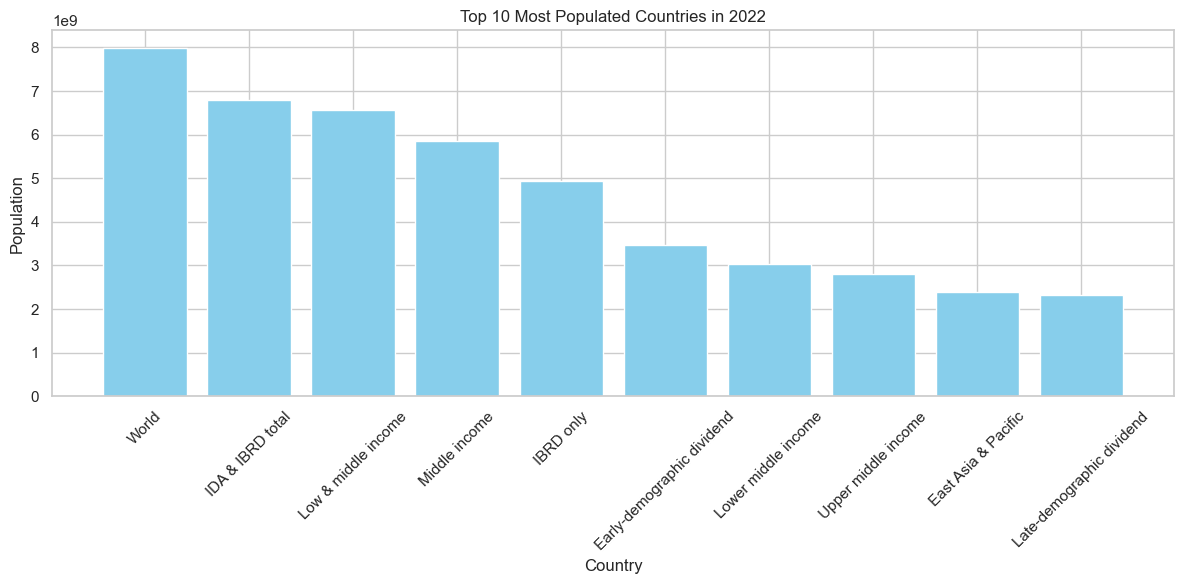

In [5]:
# Top 10 most populated countries in 2022
top10 = df_clean[['Country Name', '2022']].sort_values(by='2022', ascending=False).head(10)

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(top10['Country Name'], top10['2022'], color='skyblue')
plt.title('Top 10 Most Populated Countries in 2022')
plt.xlabel('Country')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


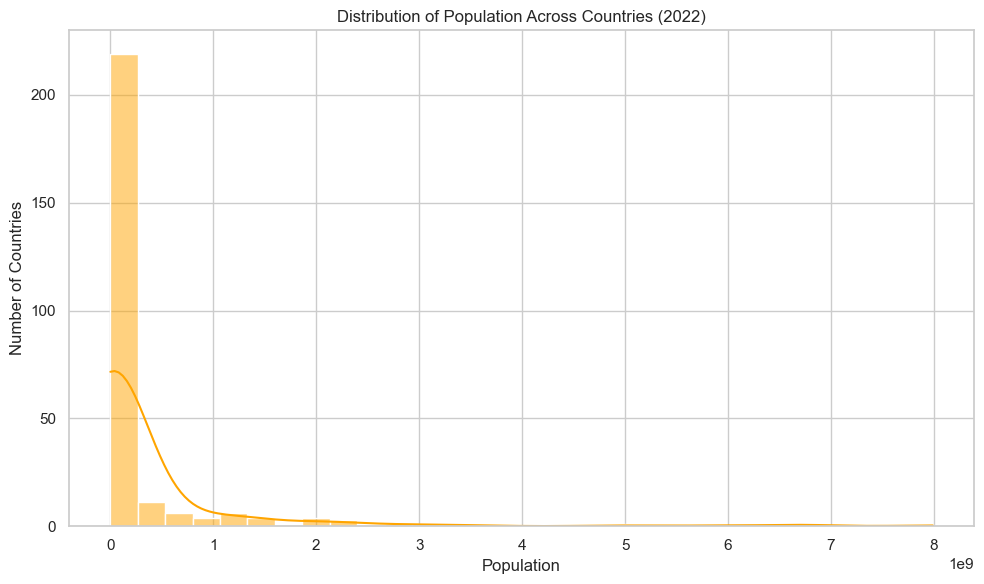

In [6]:
# Histogram of population distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['2022'], bins=30, kde=True, color='orange')
plt.title('Distribution of Population Across Countries (2022)')
plt.xlabel('Population')
plt.ylabel('Number of Countries')
plt.tight_layout()
plt.show()


In [7]:
# Optional: Save one of the charts
# plt.savefig('top10_population_2022.png')


### ✅ Summary
- Cleaned the dataset by removing metadata and irrelevant columns.
- Visualized top 10 most populated countries.
- Visualized overall population distribution across countries.